# Pandas Basics <hr style="border:3px solid #B57EDC"></hr>

Data Analyst: Issabern Martij Ever A. Casio <br>
Department: Electrical Engineering

# Data Frame

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [87]:
data = {
    "name":['Henry','Owen','Ada'],
    "age":[22, 35, 58],
    "sex":['M', 'M', 'F']
}
data

{'name': ['Henry', 'Owen', 'Ada'], 'age': [22, 35, 58], 'sex': ['M', 'M', 'F']}

In [88]:
df = pd.DataFrame(data)
df

,name,age,sex
0,Henry,22,M
1,Owen,35,M
2,Ada,58,F


In [89]:
df['age']

0    22
1    35
2    58
Name: age, dtype: int64

In [90]:
df['age'].sum()

115

In [91]:
df['age'].mean()

38.333333333333336

In [92]:
df['age'].std()

18.230011885167087

# Correlation

In [93]:
measurements = {
    "current": [1.8, 2, 2.7, 3.5, 4.2],
    "power": [90, 100, 110, 200, 210]
}
measurements

{'current': [1.8, 2, 2.7, 3.5, 4.2], 'power': [90, 100, 110, 200, 210]}

In [94]:
device = pd.DataFrame(measurements)
device

,current,power
0,1.8,90
1,2.0,100
2,2.7,110
3,3.5,200
4,4.2,210


In [96]:
device.cov()

,current,power
current,1.023,56.15
power,56.150,3370.00


In [98]:
device.corr()

,current,power
current,1.000000,0.956306
power,0.956306,1.000000


In [99]:
device.describe()

,current,power
count,5.000000,5.000000
mean,2.840000,142.000000
std,1.011435,58.051701
min,1.800000,90.000000
25%,2.000000,100.000000
50%,2.700000,110.000000
75%,3.500000,200.000000
max,4.200000,210.000000


## Scatter Plot

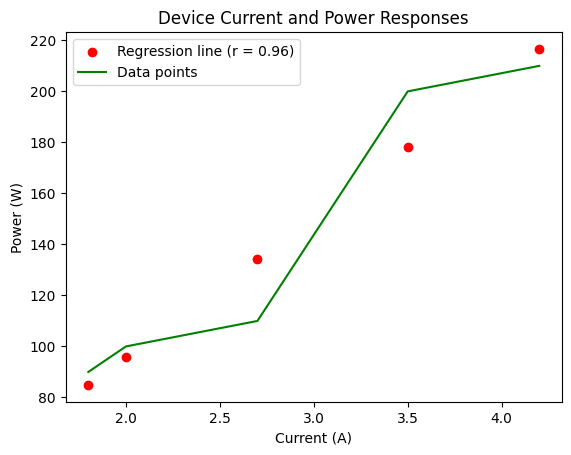

In [130]:
x = device['current']
y = device['power']

# regression line
m, b, r, p_value, std_err = stats.linregress(x,y)
line = m*x+b

plt.scatter(x, line,
         color = 'r',
         label = f'Regression line (r = {r:.2f})')

plt.plot(x,y,
            color = 'g',
            label = 'Data points')
plt.title('Device Current and Power Responses')
plt.ylabel('Power (W)')
plt.xlabel('Current (A)')
plt.legend()
plt.show()

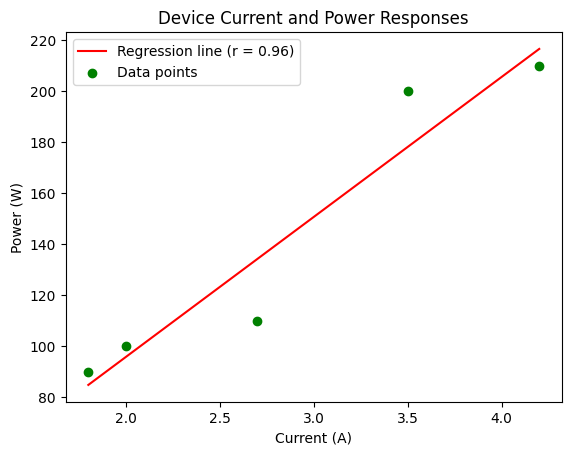

In [129]:
x = device['current']
y = device['power']

# regression line
m, b, r, p_value, std_err = stats.linregress(x,y)
line = m*x+b

plt.plot(x, line,
         color = 'r',
         label = f'Regression line (r = {r:.2f})')

# scatter
plt.scatter(x,y,
            color = 'g',
            label = 'Data points')
plt.title('Device Current and Power Responses')
plt.ylabel('Power (W)')
plt.xlabel('Current (A)')
plt.legend()
plt.show()

## Resistance Test

In [133]:
resistance = pd.read_csv(r"resistance-test.csv")
resistance

,Test No.,Jaguar,Panther
0,1,10.6,10.1
1,2,9.1,11.0
2,3,9.3,9.1
3,4,9.8,20.0
4,5,10.5,9.2
5,6,10.4,10.8
6,7,9.5,9.9
7,8,11.0,9.2
8,9,10.4,9.1
9,10,3.0,9.1


In [135]:
resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test No.  11 non-null     int64  
 1   Jaguar    11 non-null     float64
 2   Panther   10 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 392.0 bytes


In [136]:
resistance['Jaguar'].mean()

9.399999999999999

In [145]:
jag_mean = resistance['Jaguar'].mean()
jag_mean

9.399999999999999

In [146]:
resistance.fillna(jag_mean)

,Test No.,Jaguar,Panther
0,1,10.6,10.10
1,2,9.1,11.00
2,3,9.3,9.10
3,4,9.8,20.00
4,5,10.5,9.20
5,6,10.4,10.80
6,7,9.5,9.90
7,8,11.0,9.20
8,9,10.4,9.10
9,10,3.0,9.10


In [149]:
resistance['Jaguar'] = resistance['Jaguar'].fillna(jag_mean)

In [141]:
pan_mean = resistance['Panther'].mean()
pan_mean

10.75

In [ ]:
resistance.fillna(pan_mean)

,Test No.,Jaguar,Panther
0,1,10.6,10.10
1,2,9.1,11.00
2,3,9.3,9.10
3,4,9.8,20.00
4,5,10.5,9.20
5,6,10.4,10.80
6,7,9.5,9.90
7,8,11.0,9.20
8,9,10.4,9.10
9,10,3.0,9.10


In [142]:
resistance['Panther'] = resistance['Panther'].fillna(pan_mean)

In [150]:
resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test No.  11 non-null     int64  
 1   Jaguar    11 non-null     float64
 2   Panther   11 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 392.0 bytes


## Bar Graph

<function matplotlib.pyplot.show(close=None, block=None)>

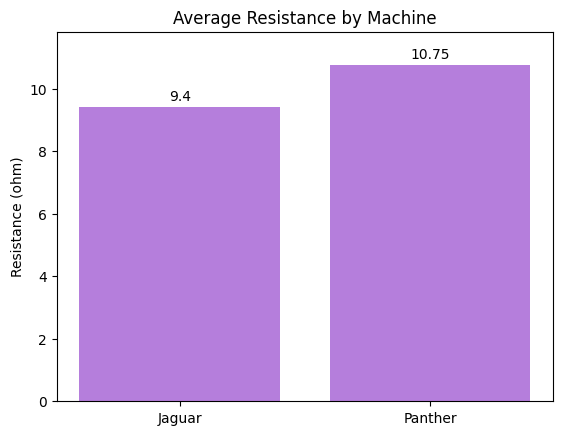

In [161]:
bars = plt.bar(['Jaguar', 'Panther'], [jag_mean, pan_mean],
               color = '#B57EDC')
plt.title('Average Resistance by Machine')
plt.ylabel('Resistance (ohm)')

# bar label
plt.bar_label(bars, padding = 3)
plt.margins(y = 0.1) # 10%

plt.show